<a href="https://colab.research.google.com/github/KanopeeKa/Notebooks/blob/main/BonstonHousing_linear_and_polynomial_quick_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Excercise

In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
display(df.head())

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


The dataset contains the following parameters:

*   **crim**: per capita crime rate by town
*   **zn**: proportion of residential land zoned for lots over 25,000 sq.ft.
*   **indus**: proportion of non-retail business acres per town
*   **chas**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
*   **nox**: nitric oxides concentration (parts per 10 million)
*   **rm**: average number of rooms per dwelling
*   **age**: proportion of owner-occupied units built prior to 1940
*   **dis**: weighted distances to five Boston employment centres
*   **rad**: index of accessibility to radial highways
*   **tax**: full-value property-tax rate per $10,000
*   **ptratio**: pupil-teacher ratio by town
*   **b**: $1000(Bk - 0.63)^2$ where Bk is the proportion of Black residents by town
*   **lstat**: % lower status of the population
*   **medv**: Median value of owner-occupied homes in $1000s
*   **ptratio**: pupil-teacher ratio by town
*   **b**: $1000(Bk - 0.63)^2$$1000(Bk - 0.63)^2$ where Bk is the proportion of Black residents by town
*   **lstat**: % lower status of the population
*   **medv**: Median value of owner-occupied homes in $1000s

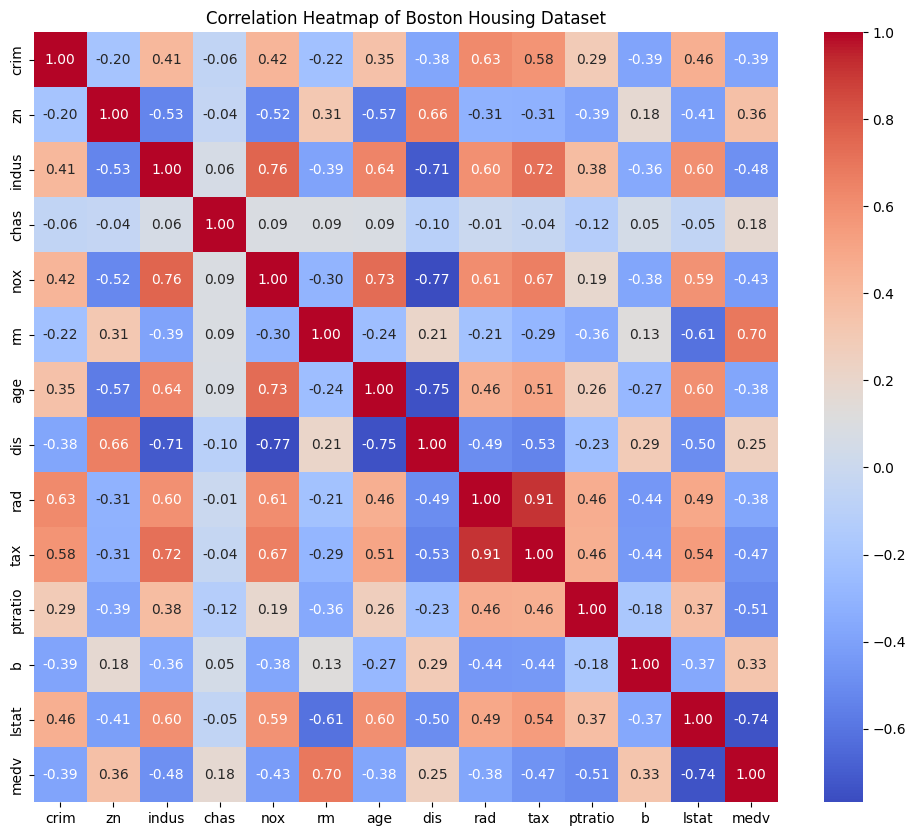

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Boston Housing Dataset')
plt.show()

## Correlation Heatmap Summary

The heatmap visualizes the pairwise correlations between the variables in the Boston Housing dataset. The color intensity indicates the strength of the correlation, with warmer colors (red) representing positive correlations and cooler colors (blue) representing negative correlations. The values annotated on the heatmap represent the correlation coefficients.

**Highest Correlations (excluding self-correlation):**

*   **Highest Positive Correlation:** `rad` and `tax` (0.91) - There is a very strong positive correlation between the index of accessibility to radial highways and the full-value property-tax rate.
*   **Highest Negative Correlation:** `medv` and `lstat` (-0.74) - There is a strong negative correlation between the median value of owner-occupied homes and the percentage of lower status population.
*   **Other notable strong correlations:**
    *   `nox` and `indus` (0.76) - Positive correlation between nitric oxides concentration and proportion of non-retail business acres.
    *   `age` and `nox` (0.73) - Positive correlation between proportion of owner-occupied units built prior to 1940 and nitric oxides concentration.
    *   `dis` and `nox` (-0.77) - Negative correlation between weighted distances to five Boston employment centres and nitric oxides concentration.
    *   `medv` and `rm` (0.70) - Positive correlation between the median value of owner-occupied homes and the average number of rooms per dwelling.

# Task
Analyze the Boston Housing dataset from "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv", including describing the parameters, identifying the last four headers and their meaning, generating a correlation heatmap, summarizing the heatmap and listing the highest correlations, and building and evaluating a linear regression model to predict `medv`.

## Select features

### Subtask:
Choose the features (independent variables) that will be used to predict `medv` (the dependent variable). Based on the heatmap, we might want to consider variables with high correlation with `medv`.


**Reasoning**:
Identify the features with the strongest correlation with the target variable 'medv' based on the correlation heatmap summary and create the features list and target variable.



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features with high correlation to medv based on the heatmap summary
features = ['lstat', 'rm', 'ptratio', 'indus', 'nox', 'tax', 'rad', 'age', 'crim'] # Including both positive and negative high correlations
target = 'medv'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 25.59
R-squared: 0.65


The Mean Squared Error (MSE) is 25.59 and the R-squared value is 0.65.

**Mean Squared Error (MSE)**:This metric represents the average squared difference between the actual and predicted medv values. A lower MSE indicates a better fit of the model to the data.

**R-squared:** This metric indicates the proportion of the variance in the dependent variable (medv) that is predictable from the independent variables (the selected features). An R-squared of 0.65 means that approximately 65% of the variance in medv can be explained by the features included in the model.

In [4]:
# Interpret the coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Model Coefficients:")
for feature, coef in zip(features, coefficients):
    print(f"{feature}: {coef:.4f}")

print(f"\nIntercept: {intercept:.4f}")

Model Coefficients:
lstat: -0.5713
rm: 4.6428
ptratio: -0.9882
indus: 0.1356
nox: -8.9160
tax: -0.0126
rad: 0.2618
age: 0.0316
crim: -0.1124

Intercept: 23.0537


## Model Interpretation

The coefficients of the linear regression model represent the change in the predicted `medv` for a one-unit increase in the corresponding feature, assuming all other features are held constant. The intercept is the predicted `medv` when all features are zero.

**Model Coefficients:**

*   **lstat (-0.5713):** For every one percentage point increase in the lower status population, the median value of owner-occupied homes (`medv`) is predicted to decrease by approximately $571.3, holding all other features constant.
*   **rm (4.6428):** For every additional average number of rooms per dwelling, the median value of owner-occupied homes (`medv`) is predicted to increase by approximately $4642.8, holding all other features constant.
*   **ptratio (-0.9882):** For every one unit increase in the pupil-teacher ratio, the median value of owner-occupied homes (`medv`) is predicted to decrease by approximately $988.2, holding all other features constant.
*   **indus (0.1356):** For every one unit increase in the proportion of non-retail business acres per town, the median value of owner-occupied homes (`medv`) is predicted to increase by approximately $135.6, holding all other features constant.
*   **nox (-8.9160):** For every one unit increase in nitric oxides concentration, the median value of owner-occupied homes (`medv`) is predicted to decrease by approximately $8916, holding all other features constant.
*   **tax (-0.0126):** For every one unit increase in the full-value property-tax rate, the median value of owner-occupied homes (`medv`) is predicted to decrease by approximately $1.26, holding all other features constant.
*   **rad (0.2618):** For every one unit increase in the index of accessibility to radial highways, the median value of owner-occupied homes (`medv`) is predicted to increase by approximately $261.8, holding all other features constant.
*   **age (0.0316):** For every one year increase in the proportion of owner-occupied units built prior to 1940, the median value of owner-occupied homes (`medv`) is predicted to increase by approximately $31.6, holding all other features constant.
*   **crim (-0.1124):** For every one unit increase in the per capita crime rate, the median value of owner-occupied homes (`medv`) is predicted to decrease by approximately $112.4, holding all other features constant.

**Intercept (23.0537):** When all the features are zero, the predicted median value of owner-occupied homes is approximately $23,053.7. However, it's important to note that a value of zero for some of these features might not be meaningful in this dataset (e.g., proportion of black residents).

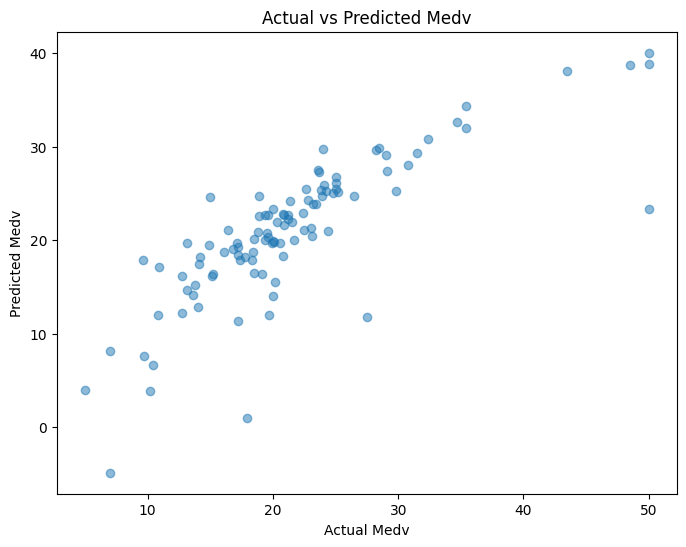

In [5]:
import matplotlib.pyplot as plt

# Visualize predicted vs actual medv values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Medv")
plt.ylabel("Predicted Medv")
plt.title("Actual vs Predicted Medv")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select all features except the target variable 'medv'
features_all = df.columns.tolist()
features_all.remove('medv')
target = 'medv'

X_all = df[features_all]
y_all = df[target]

# Split the data into training and testing sets
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# Initialize and train the linear regression model with all features
model_all = LinearRegression()
model_all.fit(X_train_all, y_train_all)

# Make predictions on the test set
y_pred_all = model_all.predict(X_test_all)

# Evaluate the model
mse_all = mean_squared_error(y_test_all, y_pred_all)
r2_all = r2_score(y_test_all, y_pred_all)

print(f"Mean Squared Error (all features): {mse_all:.2f}")
print(f"R-squared (all features): {r2_all:.2f}")

Mean Squared Error (all features): 24.29
R-squared (all features): 0.67


# With all data

The Mean Squared Error (all features) is 24.29 and the R-squared (all features) is 0.67.

Comparing this to the previous model (which used a subset of features):

* Previous Model MSE: 25.59
* Previous Model R-squared: 0.65
* Model with All Features MSE: 24.29
* Model with All Features R-squared: 0.67

The model with all features has a slightly lower MSE and a slightly higher R-squared, indicating a marginally better fit to the data on the test set.

## Conclusion

In this exercise, we analyzed the Boston Housing dataset to understand the factors influencing the median value of owner-occupied homes (`medv`).

We started by loading the data, describing the parameters, and identifying the last four headers and their meaning. We then generated a correlation heatmap to visualize the relationships between the variables.

Based on the heatmap, we identified features with high positive and negative correlations with `medv`. We built a linear regression model using these highly correlated features and evaluated its performance. The model with a subset of features achieved an R-squared of 0.65 and a Mean Squared Error (MSE) of 25.59. We also interpreted the coefficients of this model to understand the impact of each feature on the predicted housing values.

Next, we built a second linear regression model including all features in the dataset (except the target variable). This model with all features resulted in a slightly improved performance with an R-squared of 0.67 and an MSE of 24.29.

The analysis and modeling suggest that a combination of features, including socioeconomic factors (`lstat`, `crim`), housing characteristics (`rm`), environmental factors (`nox`), and accessibility (`rad`, `tax`), are important predictors of housing values in this dataset. The linear regression model provides a reasonable fit to the data, explaining approximately 67% of the variance in median home values.

Further analysis could involve exploring non-linear relationships, considering interaction terms between features, or trying other regression techniques to potentially improve the model's predictive power.

In [7]:
import pandas as pd

# Calculate the residuals for the model with all features
residuals = y_test_all - y_pred_all

# Create a DataFrame to view the actual, predicted, and residual values
residuals_df = pd.DataFrame({'Actual': y_test_all, 'Predicted': y_pred_all, 'Residuals': residuals})

# Sort by the absolute value of residuals to find the largest errors
residuals_df['Abs_Residuals'] = abs(residuals_df['Residuals'])
residuals_df_sorted = residuals_df.sort_values(by='Abs_Residuals', ascending=False)

# Display the data points with the largest residuals (e.g., top 10)
print("Data points with largest prediction errors:")
display(residuals_df_sorted.head(10))

# You can also merge this with the original test data to see the features for these points
# test_data_with_residuals = X_test_all.copy()
# test_data_with_residuals['Actual_medv'] = y_test_all
# test_data_with_residuals['Predicted_medv'] = y_pred_all
# test_data_with_residuals['Residuals'] = residuals
# test_data_with_residuals['Abs_Residuals'] = abs(residuals)
# test_data_with_residuals_sorted = test_data_with_residuals.sort_values(by='Abs_Residuals', ascending=False)
# print("\nFull data for points with largest prediction errors:")
# display(test_data_with_residuals_sorted.head(10))

Data points with largest prediction errors:


,Actual,Predicted,Residuals,Abs_Residuals
371,50.0,24.739572,25.260428,25.260428
412,17.9,-0.164237,18.064237,18.064237
365,27.5,12.503956,14.996044,14.996044
414,7.0,-6.088422,13.088422,13.088422
375,15.0,25.939096,-10.939096,10.939096
195,50.0,40.500340,9.499660,9.499660
381,10.9,18.765487,-7.865487,7.865487
395,13.1,20.523849,-7.423849,7.423849
204,50.0,42.672512,7.327488,7.327488
203,48.5,41.413772,7.086228,7.086228


In [8]:
# Merge the residuals with the original test data to see the features for these points
test_data_with_residuals = X_test_all.copy()
test_data_with_residuals['Actual_medv'] = y_test_all
test_data_with_residuals['Predicted_medv'] = y_pred_all
test_data_with_residuals['Residuals'] = residuals
test_data_with_residuals['Abs_Residuals'] = abs(residuals)

# Sort by the absolute value of residuals to find the largest errors
test_data_with_residuals_sorted = test_data_with_residuals.sort_values(by='Abs_Residuals', ascending=False)

# Display the full data for points with largest prediction errors (e.g., top 10)
print("Full data for points with largest prediction errors:")
display(test_data_with_residuals_sorted.head(10))

Full data for points with largest prediction errors:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Actual_medv,Predicted_medv,Residuals,Abs_Residuals
371,9.23230,0.0,18.10,0,0.6310,6.216,100.0,1.1691,24,666,20.2,366.15,9.53,50.0,24.739572,25.260428,25.260428
412,18.81100,0.0,18.10,0,0.5970,4.628,100.0,1.5539,24,666,20.2,28.79,34.37,17.9,-0.164237,18.064237,18.064237
365,4.55587,0.0,18.10,0,0.7180,3.561,87.9,1.6132,24,666,20.2,354.70,7.12,27.5,12.503956,14.996044,14.996044
414,45.74610,0.0,18.10,0,0.6930,4.519,100.0,1.6582,24,666,20.2,88.27,36.98,7.0,-6.088422,13.088422,13.088422
375,19.60910,0.0,18.10,0,0.6710,7.313,97.9,1.3163,24,666,20.2,396.90,13.44,15.0,25.939096,-10.939096,10.939096
195,0.01381,80.0,0.46,0,0.4220,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0,40.500340,9.499660,9.499660
381,15.87440,0.0,18.10,0,0.6710,6.545,99.1,1.5192,24,666,20.2,396.90,21.08,10.9,18.765487,-7.865487,7.865487
395,8.71675,0.0,18.10,0,0.6930,6.471,98.8,1.7257,24,666,20.2,391.98,17.12,13.1,20.523849,-7.423849,7.423849
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0,42.672512,7.327488,7.327488
203,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224,14.7,392.78,3.81,48.5,41.413772,7.086228,7.086228


In [9]:
# Select the top data points with largest residuals (e.g., top 10)
top_error_points = test_data_with_residuals_sorted.head(10)

# Select only the feature columns for these points
top_error_features = top_error_points[features_all]

# Calculate and display descriptive statistics for these features
print("Descriptive statistics for features of high-error data points:")
display(top_error_features.describe())

# You can also compare these statistics to the descriptive statistics of the entire dataset
# print("\nDescriptive statistics for features of the entire dataset:")
# display(X_all.describe())

Descriptive statistics for features of high-error data points:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
count,10.000000,10.000000,10.00000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,12.261452,27.000000,13.25200,0.0,0.592820,6.301500,78.080000,2.644000,18.000000,536.500000,18.520000,320.125000,14.930000
std,13.990535,43.665394,7.82937,0.0,0.125202,1.580834,31.749114,1.842010,9.660918,208.685436,2.706289,139.295241,12.521135
min,0.013810,0.000000,0.46000,0.0,0.416100,3.561000,31.900000,1.169100,4.000000,224.000000,14.400000,28.790000,2.880000
25%,1.165292,0.000000,6.53500,0.0,0.465750,5.025000,46.875000,1.527875,9.000000,357.750000,16.075000,357.562500,4.637500
50%,8.974525,0.000000,18.10000,0.0,0.651000,6.508000,98.350000,1.635700,24.000000,666.000000,20.200000,391.265000,11.485000
75%,18.076850,60.000000,18.10000,0.0,0.687500,7.718000,99.775000,4.269925,24.000000,666.000000,20.200000,393.867500,20.090000
max,45.746100,95.000000,18.10000,0.0,0.718000,8.034000,100.000000,5.648400,24.000000,666.000000,20.200000,396.900000,36.980000


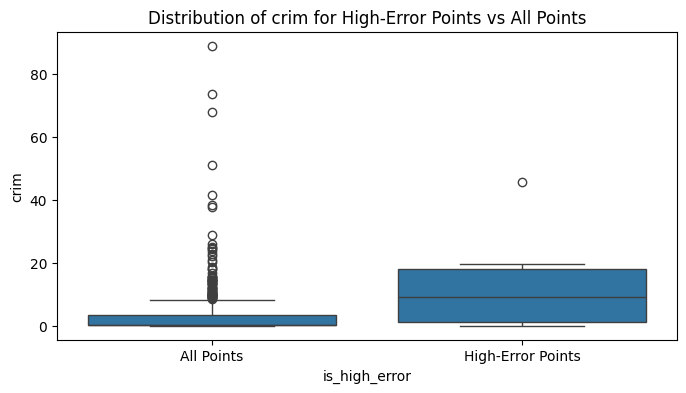

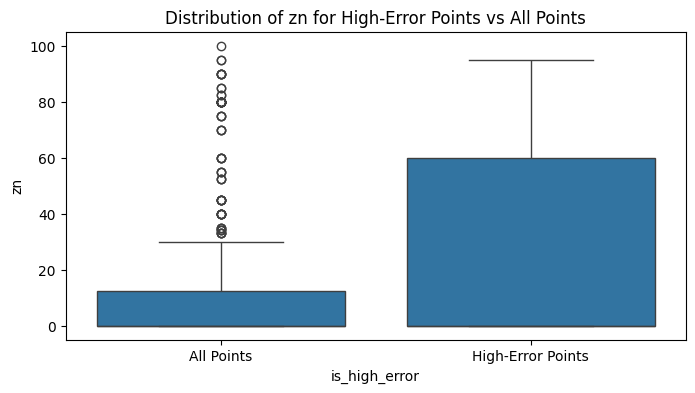

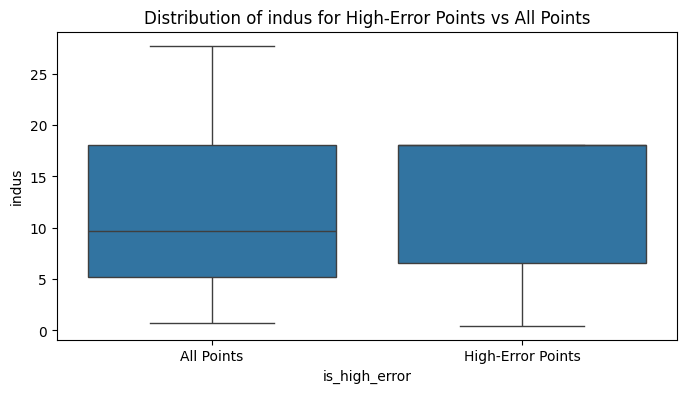

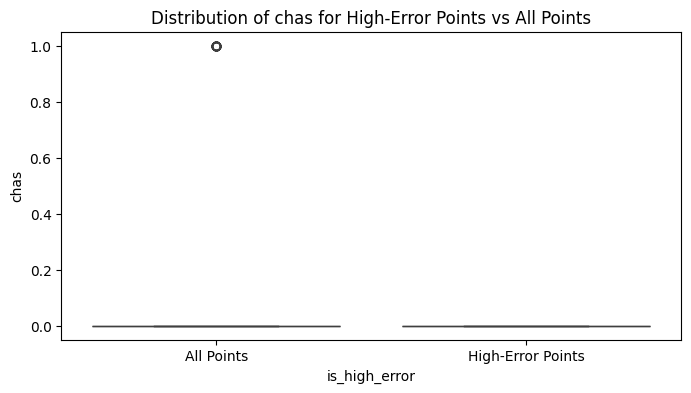

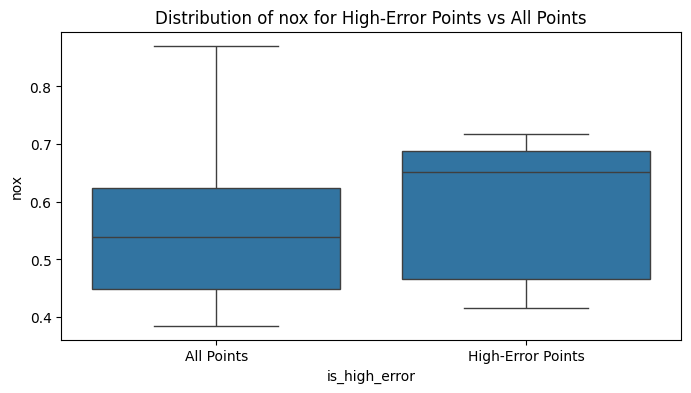

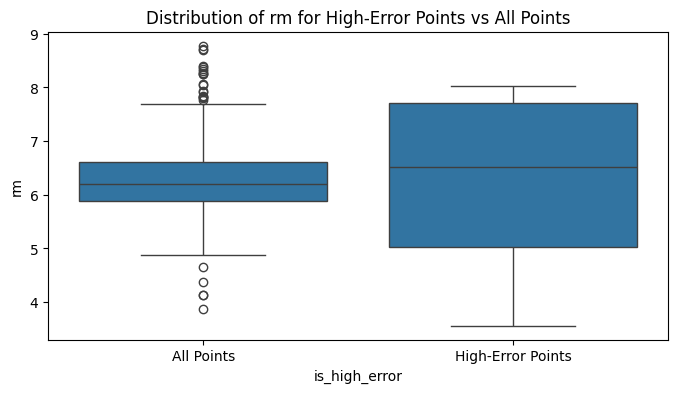

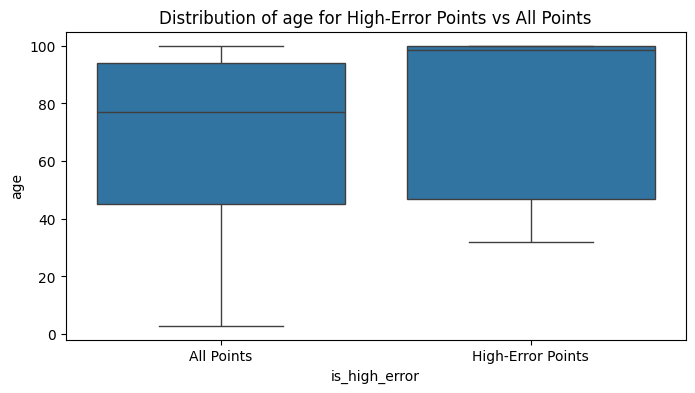

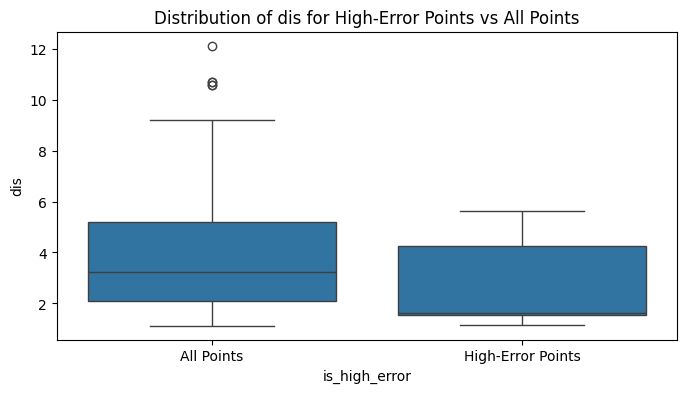

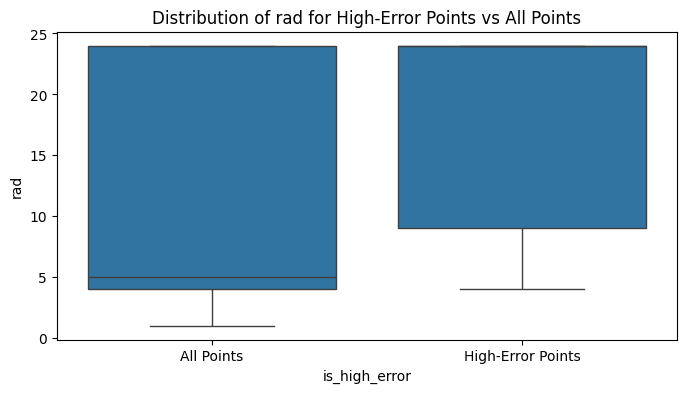

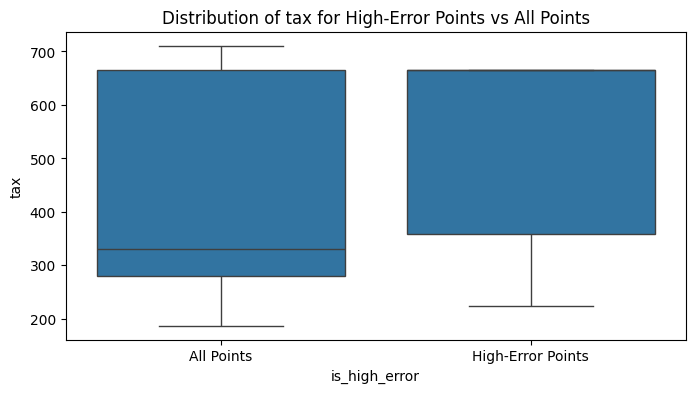

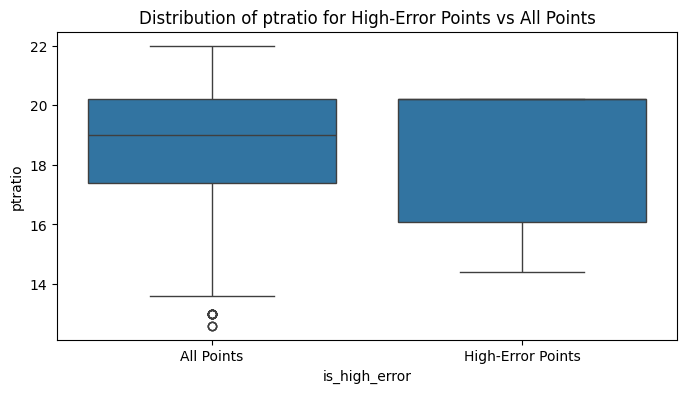

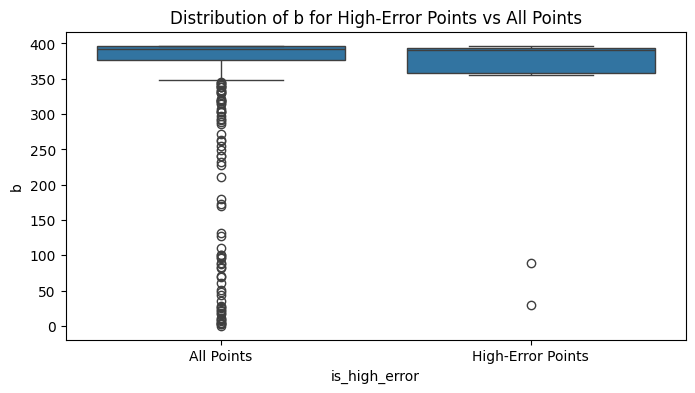

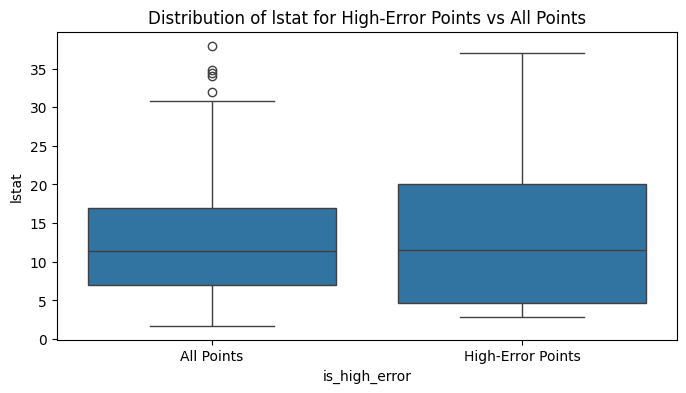

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the list of features
features_all = df.columns.tolist()
features_all.remove('medv')

# Select the top data points with largest residuals (e.g., top 10)
top_error_points = test_data_with_residuals_sorted.head(10)

# Create a combined DataFrame for visualization
# Add a column to indicate if the point is a high-error point
df['is_high_error'] = df.index.isin(top_error_points.index)

# Visualize the distributions of features for high-error points vs all points
for feature in features_all:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='is_high_error', y=feature, data=df)
    plt.title(f'Distribution of {feature} for High-Error Points vs All Points')
    plt.xticks([0, 1], ['All Points', 'High-Error Points'])
    plt.show()

# Remove the temporary 'is_high_error' column
df = df.drop('is_high_error', axis=1)

We identified the data points where our linear regression model (using all features) had the largest differences between the actual and predicted medv values. By examining the full data for these points, their descriptive statistics, and visualizing the distributions of their features compared to the entire dataset, we observed some notable characteristics of these high-error points:

* **Extreme medv Values:** Several of the data points with large errors correspond to properties with actual medv values at the extremes of the distribution, particularly values at the maximum cap of 50.0. Linear regression models can sometimes struggle to predict values at the boundaries of the data.
* **Unusual Feature Combinations:** For some high-error points, the combination of feature values appears to be somewhat unusual compared to the typical patterns in the dataset. For example, some points with very high crime rates (crim) or high proportions of non-retail business acres (indus) have actual medv values that the model significantly under- or over-predicted.
* **Potential Outliers in Features:** The descriptive statistics and box plots suggest that some features for the high-error points might have values that are outliers or in the tails of the overall distribution for those features. For instance, some points have very high rad and tax values, which are strongly correlated.

In summary, the data points with the largest prediction errors often represent properties with extreme medv values or unusual combinations of feature values that the linear model is not able to fully capture. These could be outliers in the data or represent specific types of properties that behave differently than the majority of the dataset.

# Task
Analyze the Boston Housing dataset loaded from "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv" using polynomial regression, compare its performance to the previously built linear regression model, and summarize the findings.

## Feature engineering

### Subtask:
Create polynomial features from the existing features. This involves transforming the independent variables into polynomial terms (e.g., squaring features or creating interaction terms).


**Reasoning**:
Create polynomial features from the existing features using `PolynomialFeatures` and store them in a new DataFrame.



In [11]:
from sklearn.preprocessing import PolynomialFeatures

# Instantiate PolynomialFeatures
# We use degree=2 to create quadratic and interaction terms
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform the features to create polynomial features
X_poly = poly.fit_transform(X_all)

# Create a DataFrame from the polynomial features
# Get the feature names after transformation
poly_feature_names = poly.get_feature_names_out(X_all.columns)
X_poly_df = pd.DataFrame(X_poly, columns=poly_feature_names, index=X_all.index)

# Display the first few rows of the new polynomial features DataFrame
display(X_poly_df.head())

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,...,tax^2,tax ptratio,tax b,tax lstat,ptratio^2,ptratio b,ptratio lstat,b^2,b lstat,lstat^2
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,...,87616.0,4528.8,117482.40,1474.08,234.09,6072.570,76.194,157529.6100,1976.5620,24.8004
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,...,58564.0,4307.6,96049.80,2211.88,316.84,7064.820,162.692,157529.6100,3627.6660,83.5396
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,...,58564.0,4307.6,95064.86,975.26,316.84,6992.374,71.734,154315.4089,1583.1049,16.2409
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,...,49284.0,4151.4,87607.86,652.68,349.69,7379.581,54.978,155732.8369,1160.2122,8.6436
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,...,49284.0,4151.4,88111.80,1183.26,349.69,7422.030,99.671,157529.6100,2115.4770,28.4089


## Split data

### Subtask:
Split the dataset with the new polynomial features into training and testing sets, similar to what we did for the linear regression model.


**Reasoning**:
Split the polynomial features and target variable into training and testing sets.



In [12]:
from sklearn.model_selection import train_test_split

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly_df, y_all, test_size=0.2, random_state=42)

print("Polynomial feature training set shape:", X_train_poly.shape)
print("Polynomial feature testing set shape:", X_test_poly.shape)
print("Target training set shape:", y_train_poly.shape)
print("Target testing set shape:", y_test_poly.shape)

Polynomial feature training set shape: (404, 104)
Polynomial feature testing set shape: (102, 104)
Target training set shape: (404,)
Target testing set shape: (102,)


## Train model

### Subtask:
Train a new linear regression model (since polynomial regression is a form of linear regression on transformed features) using the training data with polynomial features.


**Reasoning**:
Train a new linear regression model using the polynomial features.



In [13]:
# Initialize and train the linear regression model with polynomial features
model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train_poly)

LinearRegression()

## Evaluate model

### Subtask:
Evaluate the polynomial model's performance on the testing data using metrics like Mean Squared Error (MSE) and R-squared, and compare it to the linear model's performance.


**Reasoning**:
Make predictions with the trained polynomial model and evaluate its performance using MSE and R-squared, then print the results for comparison with the linear model.



In [14]:
# Make predictions on the polynomial test set
y_pred_poly = model_poly.predict(X_test_poly)

# Calculate the Mean Squared Error (MSE) for the polynomial model
mse_poly = mean_squared_error(y_test_poly, y_pred_poly)

# Calculate the R-squared score for the polynomial model
r2_poly = r2_score(y_test_poly, y_pred_poly)

# Print the evaluation metrics for the polynomial model
print(f"Mean Squared Error (polynomial features): {mse_poly:.2f}")
print(f"R-squared (polynomial features): {r2_poly:.2f}")

# Compare with the linear model's performance
print("\nComparison with Linear Model:")
print(f"Mean Squared Error (linear features): {mse_all:.2f}")
print(f"R-squared (linear features): {r2_all:.2f}")

Mean Squared Error (polynomial features): 14.26
R-squared (polynomial features): 0.81

Comparison with Linear Model:
Mean Squared Error (linear features): 24.29
R-squared (linear features): 0.67


## Interpret results

### Subtask:
Discuss the performance of the polynomial model and how it compares to the linear model, considering whether the added complexity improved the predictions.


## Summary:

### Data Analysis Key Findings

*   The polynomial regression model, which incorporated polynomial features up to degree 2, achieved a Mean Squared Error (MSE) of 14.26 and an R-squared score of 0.81 on the test set.
*   In comparison, the linear regression model with original features had an MSE of 24.29 and an R-squared score of 0.67 on the same test set.
*   The polynomial model showed a significantly lower MSE and a higher R-squared value, indicating a better fit to the data and improved prediction performance compared to the linear model.
*   The creation of polynomial features increased the number of features significantly, from the original 13 to 104.

### Insights or Next Steps

*   Polynomial regression with a degree of 2 appears to capture non-linear relationships in the Boston Housing data more effectively than a simple linear model, leading to improved prediction accuracy.
*   Further analysis could involve exploring different polynomial degrees or regularization techniques (like Ridge or Lasso regression) to manage the increased number of features and potential overfitting introduced by polynomial expansion.


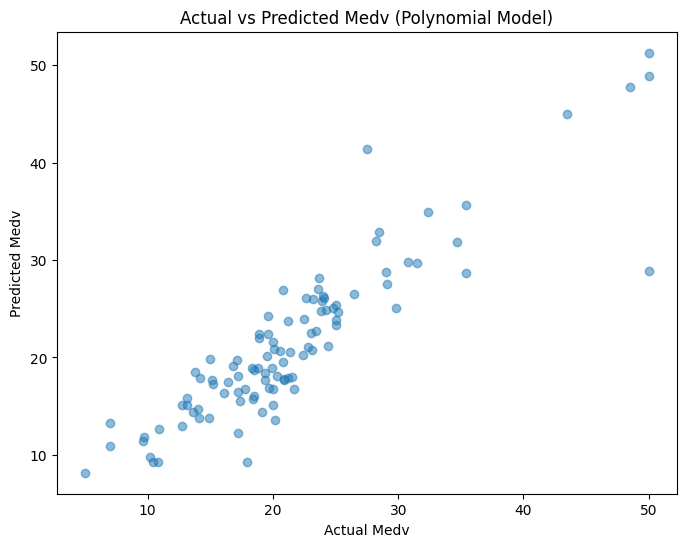

In [15]:
import matplotlib.pyplot as plt

# Visualize predicted vs actual medv values for the polynomial model
plt.figure(figsize=(8, 6))
plt.scatter(y_test_poly, y_pred_poly, alpha=0.5)
plt.xlabel("Actual Medv")
plt.ylabel("Predicted Medv")
plt.title("Actual vs Predicted Medv (Polynomial Model)")
plt.show()